# Perguntas: 
1) Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?
2) Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

TRATAMENTO DOS DADOS

In [391]:
# Importando as bases e bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df1 = pd.read_csv('Arquivos_TERA/Desafio_inferencia/DEMO_PHQ.csv', names=['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Genero', 'Idade', 'Etnia', 'Escolaridade', 'Renda'], header = 0) #dados demográficos e resultados da PHQ-9
df2 = pd.read_csv('Arquivos_TERA/Desafio_inferencia/PAG_HEI.csv', names=['ID', 'TIME_PAGMIN', 'Ad_PAG', 'TOTALVEG', 'GREEN_AND_BEAN', 'TOTALFRUIT', 'WHOLEFRUIT', 'WHOLEGRAIN', 'TOTALDAIRY', 'TOTPROT', 'SEAPLANT_PROT', 'FATTYACID', 'SODIUM', 'REFINEDGRAIN', 'SFAT', 'ADDSUG', 'TOTAL_SCORE'], header = 0)  #dados de atividade física e questionário HEI 

In [392]:
# Resumindo os dataframes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5334 non-null   int64  
 1   Q1            4836 non-null   float64
 2   Q2            4836 non-null   float64
 3   Q3            4836 non-null   float64
 4   Q4            4836 non-null   float64
 5   Q5            4836 non-null   float64
 6   Q6            4836 non-null   float64
 7   Q7            4836 non-null   float64
 8   Q8            4836 non-null   float64
 9   Q9            4836 non-null   float64
 10  Genero        5334 non-null   int64  
 11  Idade         5334 non-null   int64  
 12  Etnia         5334 non-null   int64  
 13  Escolaridade  5334 non-null   int64  
 14  Renda         5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [393]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9424 non-null   int64  
 1   TIME_PAGMIN     7150 non-null   float64
 2   Ad_PAG          7150 non-null   float64
 3   TOTALVEG        8549 non-null   float64
 4   GREEN_AND_BEAN  8549 non-null   float64
 5   TOTALFRUIT      8549 non-null   float64
 6   WHOLEFRUIT      8549 non-null   float64
 7   WHOLEGRAIN      8549 non-null   float64
 8   TOTALDAIRY      8549 non-null   float64
 9   TOTPROT         8549 non-null   float64
 10  SEAPLANT_PROT   8549 non-null   float64
 11  FATTYACID       8549 non-null   float64
 12  SODIUM          8549 non-null   float64
 13  REFINEDGRAIN    8549 non-null   float64
 14  SFAT            8549 non-null   float64
 15  ADDSUG          8549 non-null   float64
 16  TOTAL_SCORE     8549 non-null   float64
dtypes: float64(16), int64(1)
memory u

In [394]:
# Combinando as bases, tendo o identificador SEQN
df = pd.merge(df1, df2, how='left', on='ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5334 non-null   int64  
 1   Q1              4836 non-null   float64
 2   Q2              4836 non-null   float64
 3   Q3              4836 non-null   float64
 4   Q4              4836 non-null   float64
 5   Q5              4836 non-null   float64
 6   Q6              4836 non-null   float64
 7   Q7              4836 non-null   float64
 8   Q8              4836 non-null   float64
 9   Q9              4836 non-null   float64
 10  Genero          5334 non-null   int64  
 11  Idade           5334 non-null   int64  
 12  Etnia           5334 non-null   int64  
 13  Escolaridade    5334 non-null   int64  
 14  Renda           5287 non-null   float64
 15  TIME_PAGMIN     5334 non-null   float64
 16  Ad_PAG          5334 non-null   float64
 17  TOTALVEG        5060 non-null   f

In [395]:
# Tratando os dados conforme dicionário 
replace_map = {
    'Q1': {7: np.nan, 9: np.nan}, # 7 e 9 não responderam as perguntas
    'Q2': {7: np.nan, 9: np.nan},
    'Q3': {7: np.nan, 9: np.nan},
    'Q4': {7: np.nan, 9: np.nan},
    'Q5': {7: np.nan, 9: np.nan},
    'Q6': {7: np.nan, 9: np.nan},
    'Q7': {7: np.nan, 9: np.nan},
    'Q8': {7: np.nan, 9: np.nan},
    'Q9': {7: np.nan, 9: np.nan},
    'Escolaridade': {7: np.nan, 9: np.nan},
    'Etnia': {5: 4}, #outros
    'Renda': {1: np.mean([0, 4999]),
              2: np.mean([5000, 9999]),
              3: np.mean([10000, 14999]),
              4: np.mean([15000, 19999]),
              5: np.mean([20000, 24999]),
              6: np.mean([25000, 34999]),
              7: np.mean([35000, 44999]),
              8: np.mean([45000, 54999]),
              9: np.mean([55000, 64999]),
              10: np.mean([65000, 74999]),
              11: 75000,
              12: np.mean([20000, 90000]),
              13: np.mean([0, 19999]),
              77: np.nan,
              99: np.nan,
    }
    
}
df2 = df.replace(replace_map)

In [396]:
# Valores faltantes
df2.isna().sum().sort_values(ascending=False)

Q8                507
Q1                507
Q3                505
Q2                503
Q4                503
Q6                503
Q5                502
Q7                502
Q9                500
WHOLEGRAIN        274
TOTALFRUIT        274
WHOLEFRUIT        274
TOTAL_SCORE       274
TOTALDAIRY        274
TOTPROT           274
TOTALVEG          274
GREEN_AND_BEAN    274
REFINEDGRAIN      274
SODIUM            274
FATTYACID         274
SFAT              274
ADDSUG            274
SEAPLANT_PROT     274
Renda             160
Escolaridade        8
ID                  0
Ad_PAG              0
Etnia               0
Idade               0
Genero              0
TIME_PAGMIN         0
dtype: int64

In [397]:
# Criando score para o questionário PHQ-9
df2['phq9'] = df2.loc[:,['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']].sum(axis = 1, skipna = False)
df2['phq9'].describe()

count    4799.000000
mean        2.732236
std         3.727676
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: phq9, dtype: float64

In [398]:
# Classificando o score
def classifica_score(x):
    if 0 <= x < 5:
        x = 0
    elif 5 <= x < 10:
        x = 1
    elif 10 <= x < 15:
        x = 2
    elif 15 <= x < 19:
        x = 3
    elif x >= 19:
        x = 4
    return x

df2['phq9_class'] = df2['phq9'].apply(lambda x: classifica_score(x))
df2['phq9_class'].value_counts()

0.0    3796
1.0     706
2.0     201
3.0      62
4.0      34
Name: phq9_class, dtype: int64

In [399]:
# Analisando faltantes
df2.isna().sum().sort_values(ascending = False)
100*df2.isna().sum().sort_values(ascending = False)/df2.shape[0] #porcentagem de valores faltantes para avaliar se podemos continuar sem grandes impactos

phq9_class        10.029996
phq9              10.029996
Q8                 9.505062
Q1                 9.505062
Q3                 9.467567
Q2                 9.430071
Q4                 9.430071
Q6                 9.430071
Q5                 9.411324
Q7                 9.411324
Q9                 9.373828
FATTYACID          5.136858
SEAPLANT_PROT      5.136858
TOTPROT            5.136858
TOTALDAIRY         5.136858
WHOLEGRAIN         5.136858
TOTALFRUIT         5.136858
WHOLEFRUIT         5.136858
SODIUM             5.136858
GREEN_AND_BEAN     5.136858
TOTALVEG           5.136858
SFAT               5.136858
REFINEDGRAIN       5.136858
ADDSUG             5.136858
TOTAL_SCORE        5.136858
Renda              2.999625
Escolaridade       0.149981
ID                 0.000000
TIME_PAGMIN        0.000000
Etnia              0.000000
Idade              0.000000
Genero             0.000000
Ad_PAG             0.000000
dtype: float64

In [400]:
# Agrupando o score criado para conter apenas 3 categorias para avaliação - mais objetiva, sem impacto pelo baixo volume em 4 e 3

df2['phq9_class'] = df2['phq9_class'].replace([3,4], 2)
df2['phq9_class'].value_counts()

0.0    3796
1.0     706
2.0     297
Name: phq9_class, dtype: int64

ANALISE EXPLORATÓRIA UNIVARIADA

In [401]:
# Criando dicionários para os tipos de variáveis
var_quanti = ['phq9', 'Renda', 'Idade', 'TIME_PAGMIN', 'TOTALVEG', 'GREEN_AND_BEAN', 'TOTALFRUIT',
              'WHOLEFRUIT', 'WHOLEGRAIN', 'TOTALDAIRY', 'TOTPROT', 'SEAPLANT_PROT', 'FATTYACID', 'SODIUM', 'REFINEDGRAIN', 
              'SFAT', 'ADDSUG', 'TOTAL_SCORE']
var_quali = ['Genero', 'Etnia', 'Escolaridade', 'Ad_PAG', 'phq9_class']
label_quali = {
    'Genero' : {1: 'Masculino', 2: 'Feminino'},
    'Etnia':{1: 'Americano \n Mexicano', 2: 'Outro', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
    'Escolaridade':{1: '< 9 ano', 2: '9-12 ano', 3: 'Ensino \n Médio', 4: 'Superior \n Incompleto', 5: 'Superior \n Completo'},
    'Ad_PAG': {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
    'phq9_class': {0: 'Sem sintomas', 1: 'Sintomas Leves', 2: 'Sintomas \n moderados-severos'}
}

In [402]:
df2[var_quanti].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,phq9,Renda,Idade,TIME_PAGMIN,TOTALVEG,GREEN_AND_BEAN,TOTALFRUIT,WHOLEFRUIT,WHOLEGRAIN,TOTALDAIRY,TOTPROT,SEAPLANT_PROT,FATTYACID,SODIUM,REFINEDGRAIN,SFAT,ADDSUG,TOTAL_SCORE
count,4799.00,5174.00,5334.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,2.73,40787.68,45.09,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,3.73,24247.24,20.15,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,2499.50,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
1%,0.00,2499.50,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,24.68
25%,0.00,17499.50,27.00,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,1.00,39999.50,43.00,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,4.00,69999.50,62.00,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
99%,17.00,75000.00,85.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,27.00,75000.00,85.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


In [403]:
# A variavel TIME_PAGMIN é referente ao tempo total semanal de atividade
# Uma semana tem no máx 160h (10080min), não há como fazer mais que isso (10777.83)
# Dado que em 99% encontramos o valor proximo a 3600min (60h semanais), irei considerar esse como máximo

df2['TIME_PAGMIN'] = np.where(df2['TIME_PAGMIN']> 3600, 3600, df2['TIME_PAGMIN'])

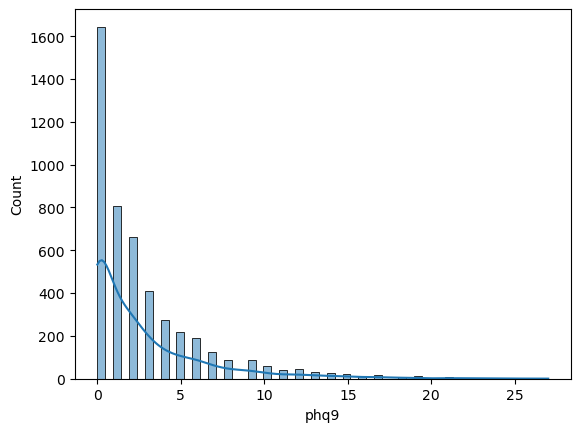

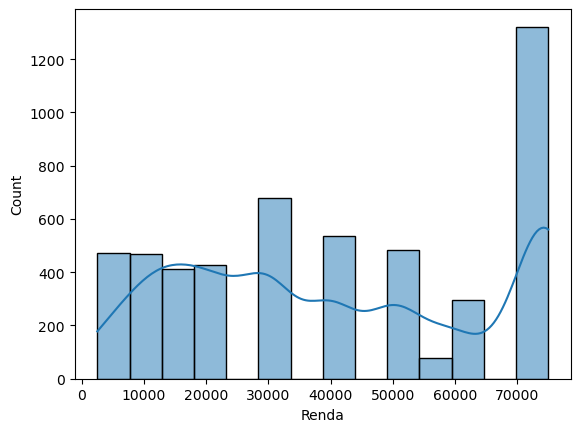

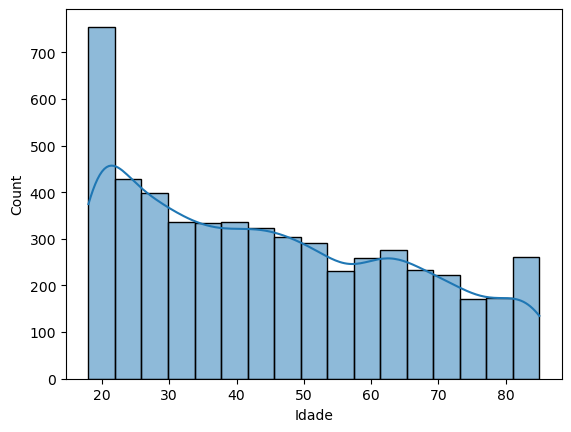

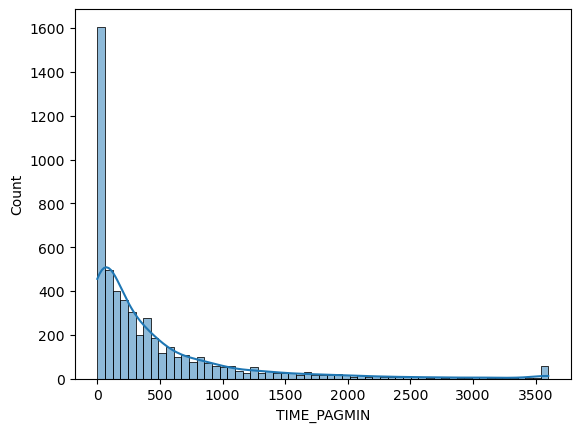

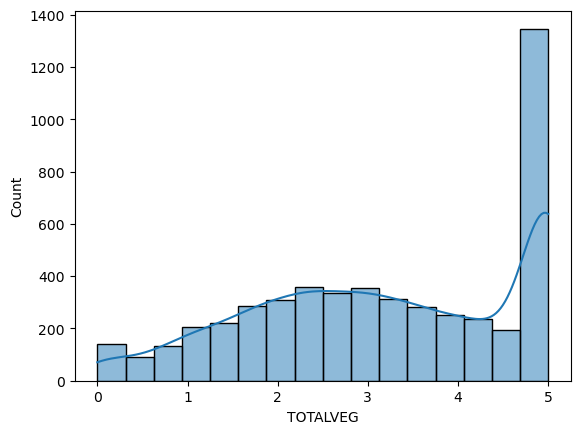

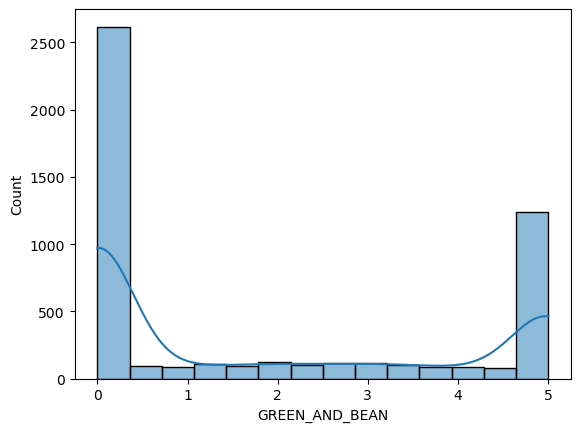

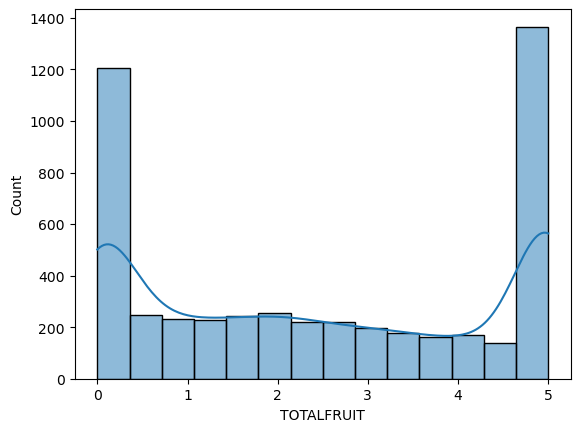

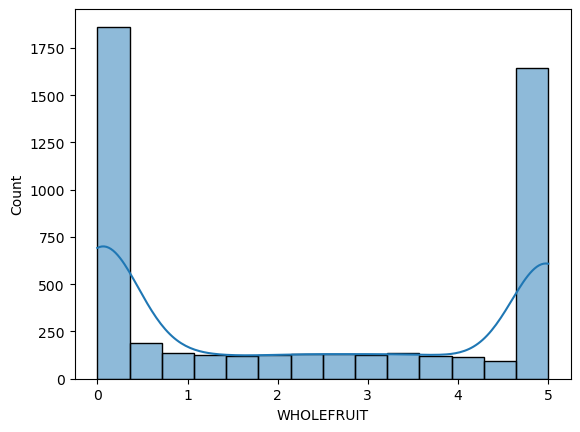

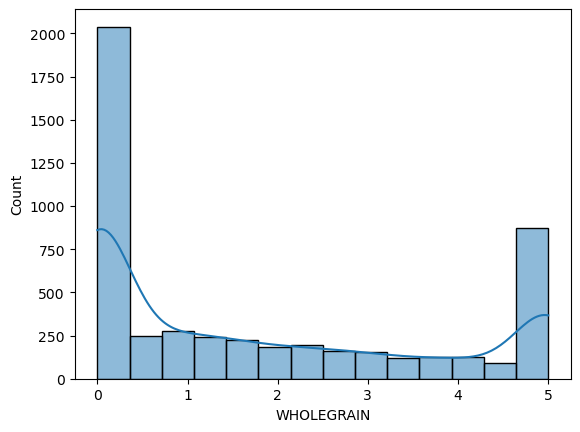

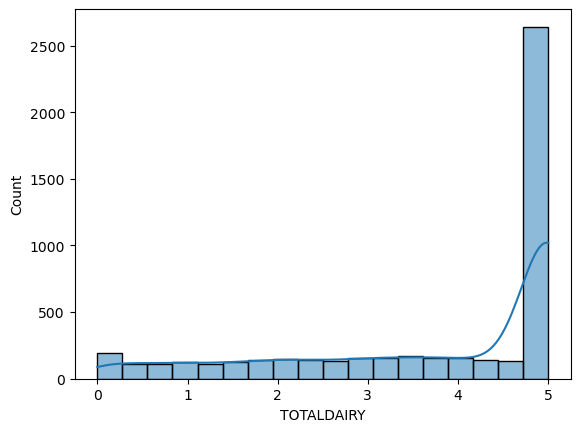

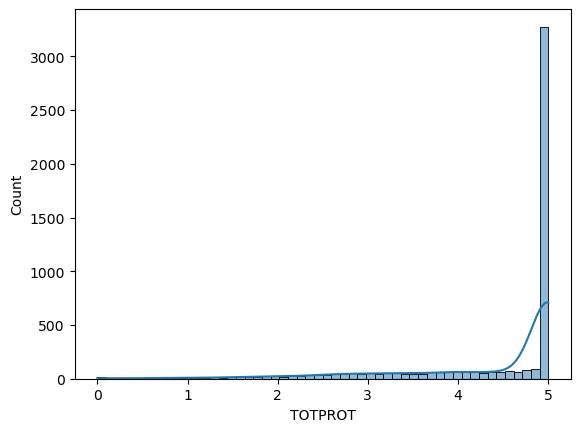

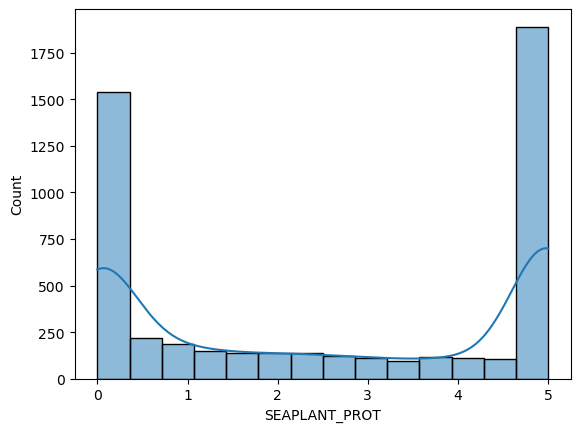

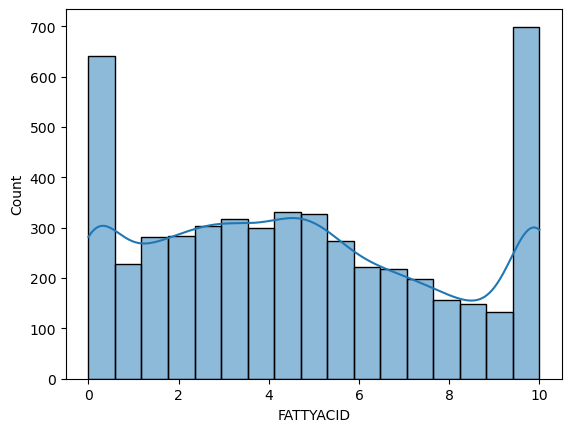

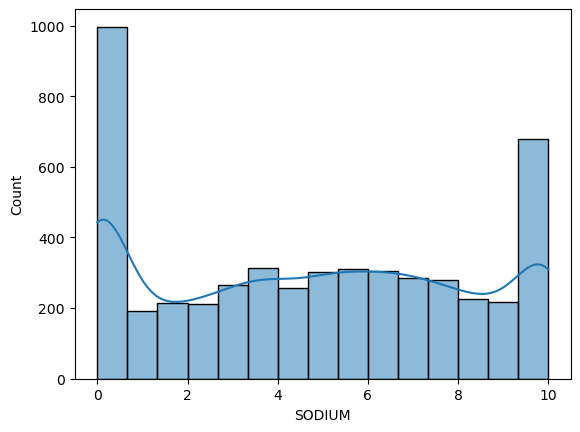

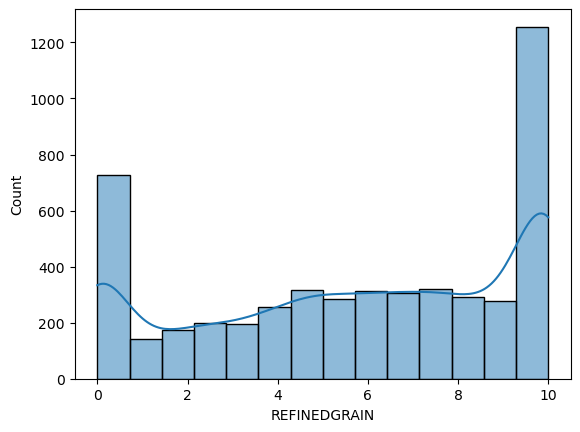

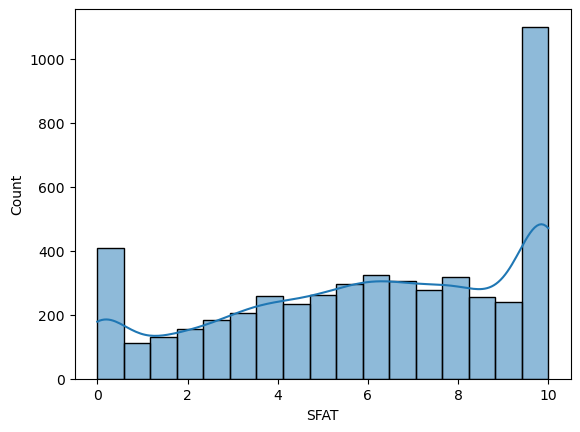

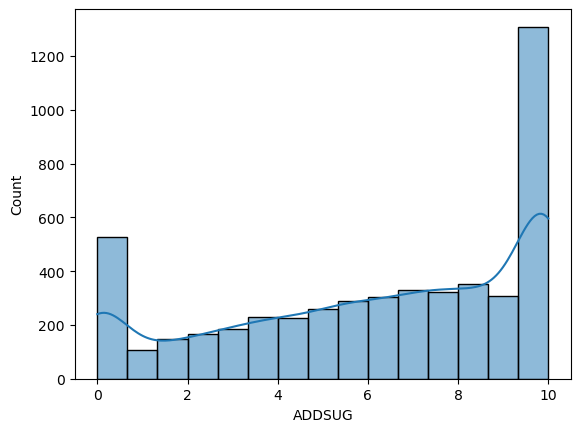

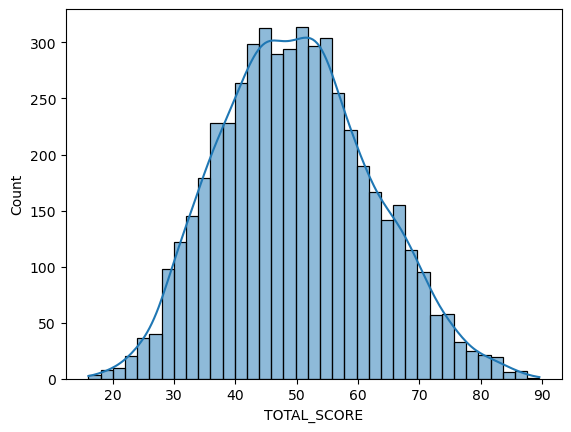

In [404]:
# Analisando as variaveis quantitativas nos gráficos
for var in var_quanti:
    sns.histplot(df2[var], kde=True)
    plt.show()

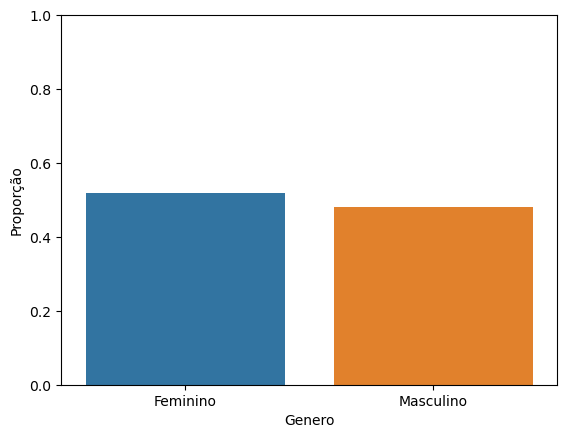

In [405]:
# Analisando as variaveis qualitativas
def grafico_barras(data, variable):
    (data[[variable]].value_counts(normalize=True, sort=True).rename("Proporção").reset_index().pipe((sns.barplot, 'data'), x=variable, y='Proporção'))
    plt.ylim(0,1)
    plt.show()
    
#Distribuição dos generos
grafico_barras(df2.replace(label_quali), variable = 'Genero')

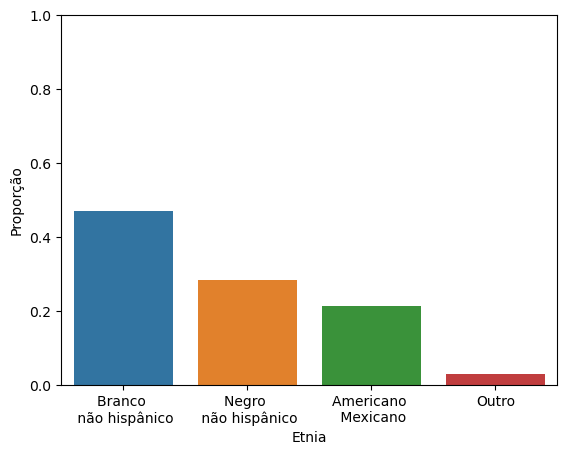

In [406]:
# Distribuição das etnias
grafico_barras(df2.replace(label_quali), variable = 'Etnia')

ANALISE EXPLORATÓRIA BIVARIADA

In [407]:
# Boxplot para analisar as variaveis quantitativas em relação aos sintomas (phq9_class)

def grafico_boxplot(data, variable, label):
    if label == "": label = variable
    sns.boxplot(x='phq9_class', y=variable, data=data.replace(label_quali))
    
    plt.ylabel(label)
    plt.show()

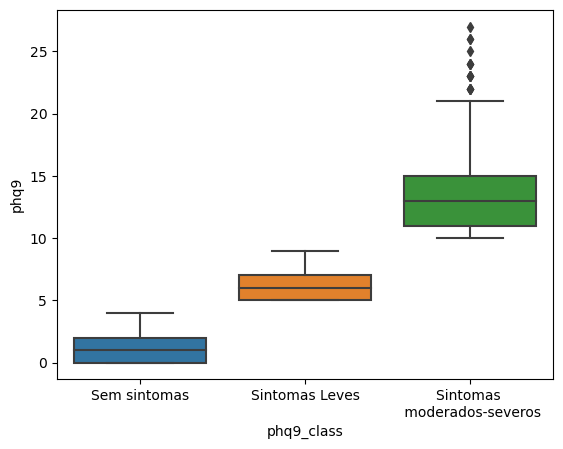

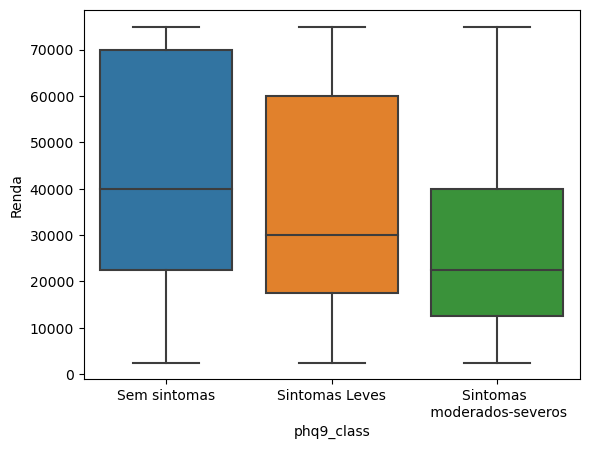

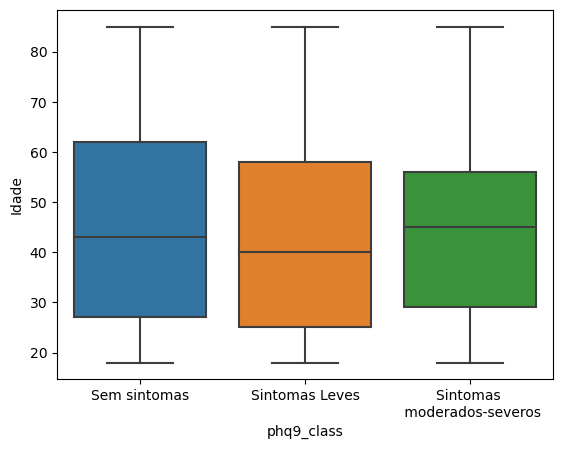

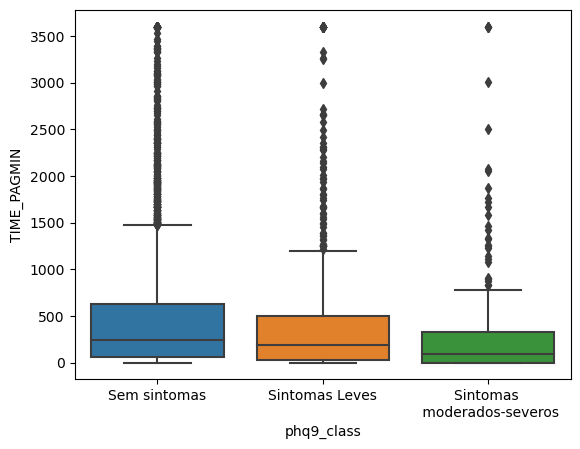

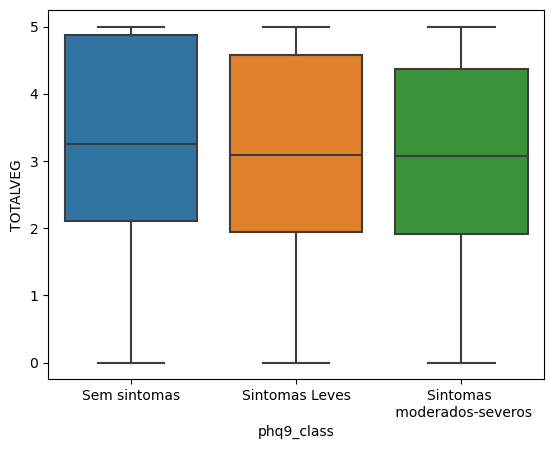

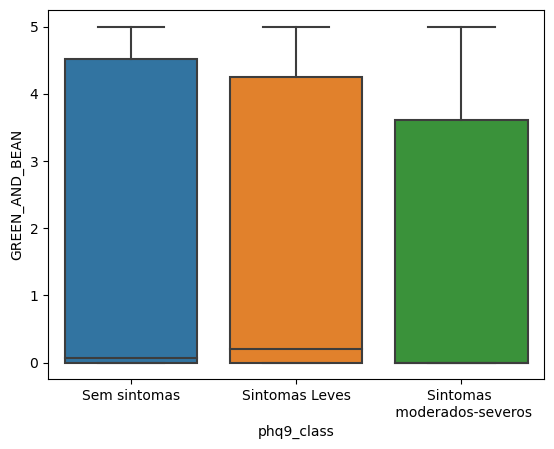

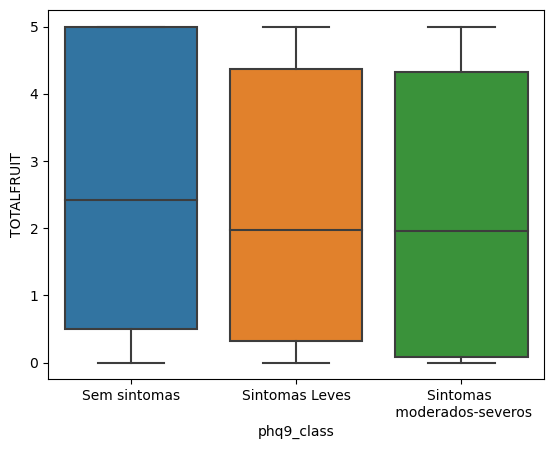

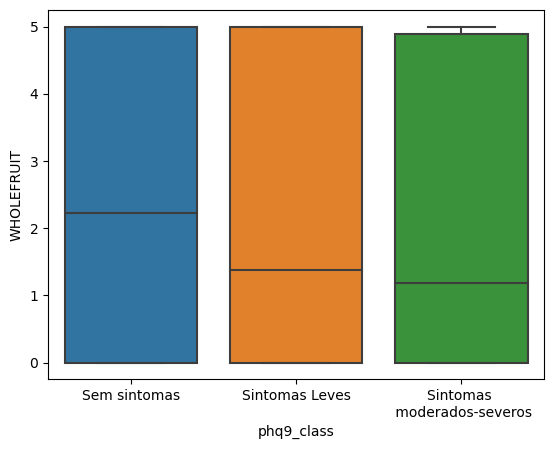

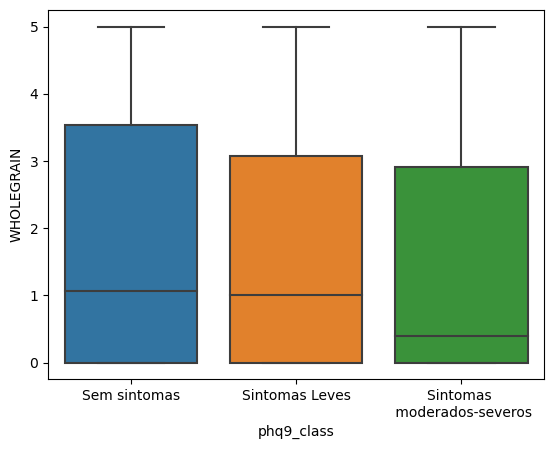

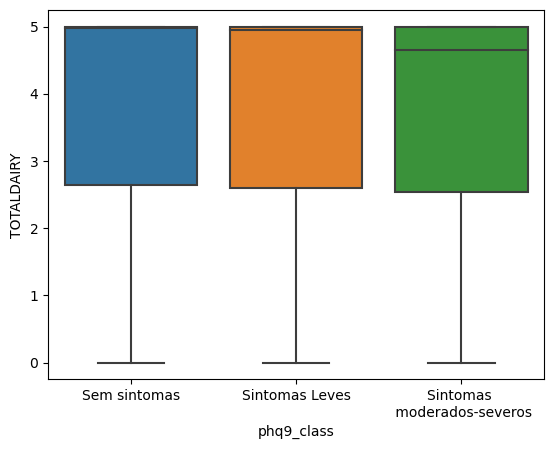

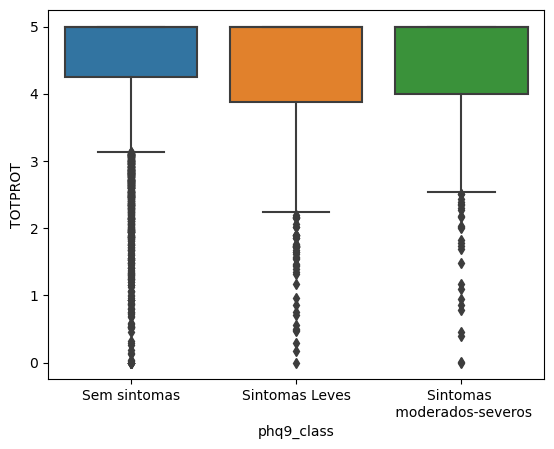

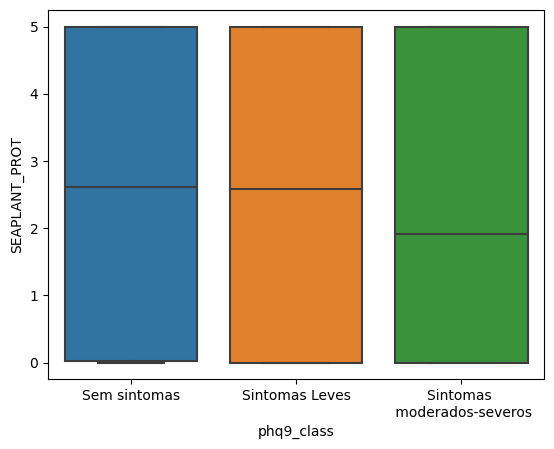

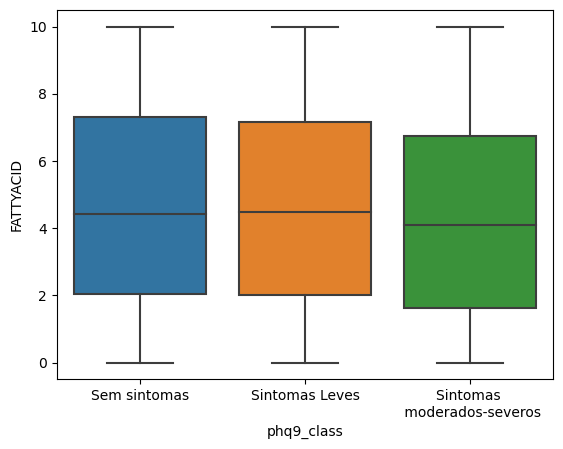

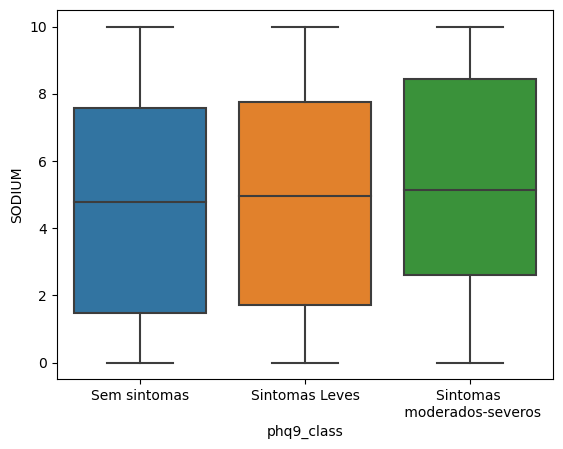

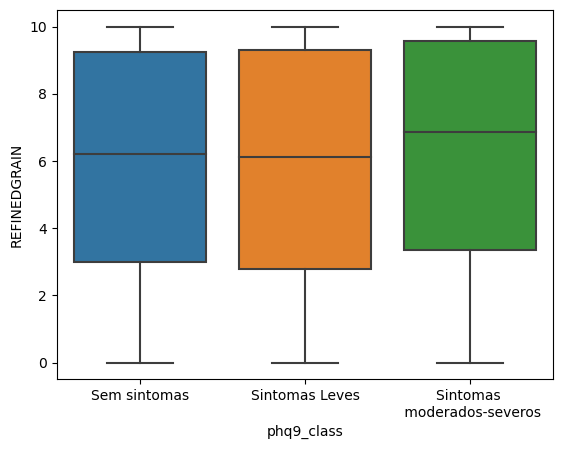

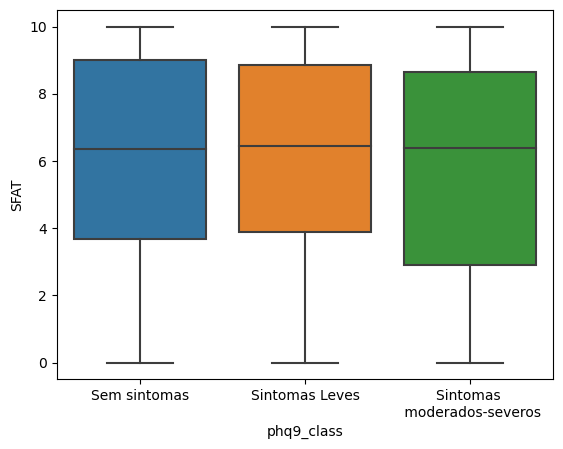

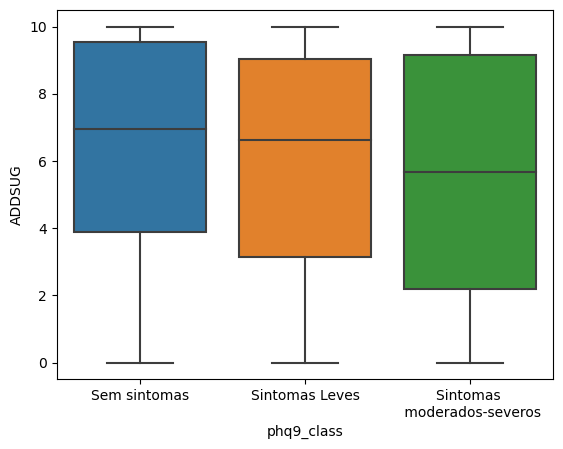

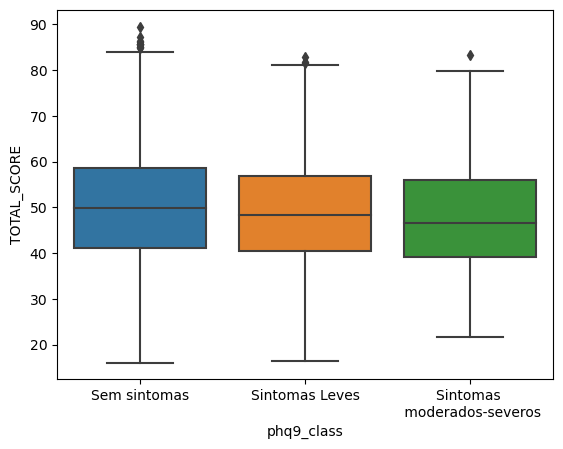

In [436]:
for var in var_quanti:
    grafico_boxplot(df2, var, "")

In [473]:
# Gráfico de barras para analisar as variaveis qualitativas com relação aos sintomas

def grafico_barras_2(data, variable):
    (data.groupby(variable)['phq9_class']
     .value_counts(normalize= True, sort = True)
     .rename('Proporção')
     .reset_index()
     .pipe((sns.catplot, 'data'), x=variable, y='Proporção', hue = 'phq9_class', kind='bar'))
    plt.ylim(0,1)
    plt.show()

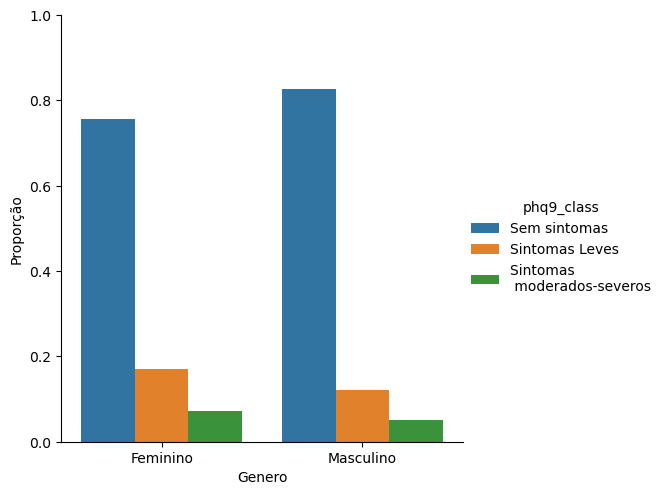

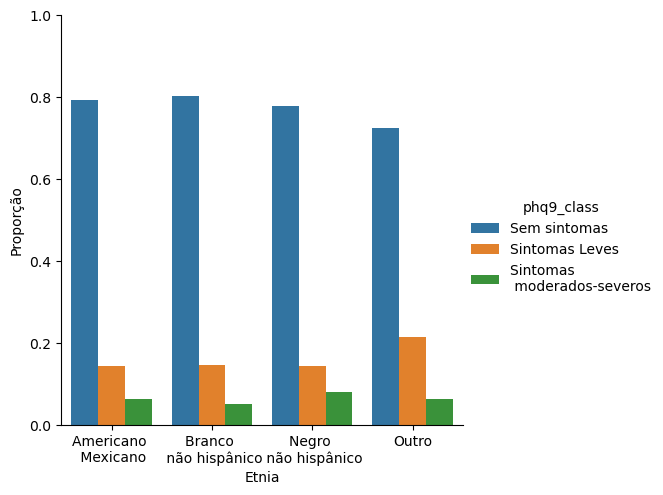

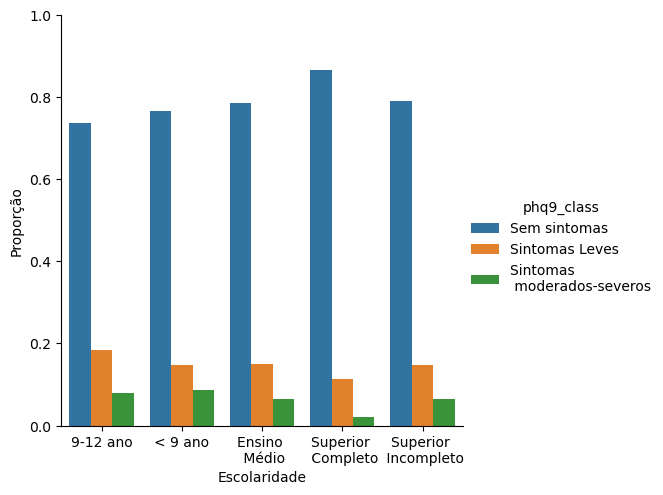

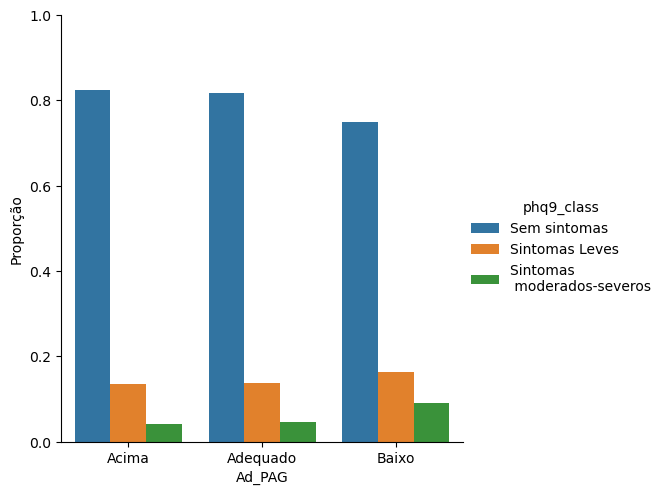

In [477]:
for var in var_quali:
    if var != 'phq9_class':
        grafico_barras_2(df2.replace(label_quali), var)

TESTES DE HIPÓTESES

In [411]:
# Comparando e analisando os sintomas depressivos (phq9_class) com as variáveis apresentadas
# Em relação a Idade
# Aplicando teste ANOVA (H0: não há diferença entre os grupos; H1: há diferença) para comparar mais de 2 grupos indep.

from scipy.stats import f_oneway
df_aux = df2[['phq9_class', 'Idade']].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq9_class == 0)]['Idade'],
                  df_aux[(df_aux.phq9_class == 1)]['Idade'],
                  df_aux[(df_aux.phq9_class == 2)]['Idade'])
print('stat = %.3f, p=%.3f' % (stat, p))

stat = 2.935, p=0.053


In [413]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df_aux['Idade'], df_aux['phq9_class'], alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.9189 0.0476 -3.8222 -0.0156   True
   0.0    2.0  -0.9317  0.715 -3.7297  1.8664  False
   1.0    2.0   0.9872 0.7513 -2.2246   4.199  False
----------------------------------------------------


Leve associação entre as idades, particularmente em relação aos sintomas leves

In [415]:
# Em relação ao gênero
# Aplicando teste de qui-quadrado (H0: não há diferença; H1: há diferença) para comparar 2 variaveis categóricas

from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df2.replace(label_quali)['Genero'],
                      df2.replace(label_quali)['phq9_class'])
stat, p, df, expected = chi2_contingency(crosstab)
print('stat = %3.f, p= %.3f' %(stat, p))

stat =  36, p= 0.000


In [417]:
100*pd.crosstab(df2.replace(label_quali)['Genero'],
                df2.replace(label_quali)['phq9_class'],
               normalize = 'index')

phq9_class,Sem sintomas,Sintomas \n moderados-severos,Sintomas Leves
Genero,,,
Feminino,75.713711,7.157218,17.129071
Masculino,82.742215,5.147059,12.110727


Há uma relação dos sintomas depressivos com gênero, especificamente há mais sintomas leves/moderados/severos em mulheres

In [418]:
# Em relação as atividades físicas
# Aplicando teste qui-quadrado (H0: não há diferença nos grupos; H1: há diferença) 

crosstab2 = pd.crosstab(df2.replace(label_quali)['Ad_PAG'],
                      df2.replace(label_quali)['phq9_class'])
stat, p, df, expected = chi2_contingency(crosstab2)
print('stat = %3.f, p= %.3f' %(stat, p))

stat =  56, p= 0.000


In [419]:
100*pd.crosstab(df2.replace(label_quali)['Ad_PAG'],
                df2.replace(label_quali)['phq9_class'],
               normalize = 'index')

phq9_class,Sem sintomas,Sintomas \n moderados-severos,Sintomas Leves
Ad_PAG,,,
Acima,82.390556,4.033448,13.575996
Adequado,81.624501,4.660453,13.715047
Baixo,74.838710,8.933002,16.228288


Há uma relação entre a prática de exercicíos físicos e sintomas depressivos

o Ad_PAG baixo representa que o indivíduo realiza menos de 150min de exercício por semana


In [421]:
# Podemos também visualizar essa relação com a variavel TIME_PAGMIN com Teste ANOVA
df_aux2 = df2[['phq9_class', 'TIME_PAGMIN']].dropna()

stat, p = f_oneway(df_aux2[(df_aux2.phq9_class == 0)]['TIME_PAGMIN'],
                  df_aux2[(df_aux2.phq9_class == 1)]['TIME_PAGMIN'],
                  df_aux2[(df_aux2.phq9_class == 2)]['TIME_PAGMIN'])
print('stat = %.3f, p=%.3f' % (stat, p))

stat = 12.983, p=0.000


In [422]:
tukey2 = pairwise_tukeyhsd(df_aux2['TIME_PAGMIN'], df_aux2['phq9_class'], alpha = 0.05)

print(tukey2)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   0.0    1.0  -42.1562 0.2724 -106.3412   22.0287  False
   0.0    2.0 -200.9972    0.0 -295.3545 -106.6399   True
   1.0    2.0  -158.841 0.0017 -267.1503  -50.5317   True
---------------------------------------------------------


Sendo que a variável TIME_PAGMIN representa o tempo total semanal de atividade em minutos

In [423]:
# Em relação aos hábitos alimentares

df_aux3 = df2[['phq9_class', 'TOTAL_SCORE']].dropna()

stat, p = f_oneway(df_aux3[(df_aux3.phq9_class == 0)]['TOTAL_SCORE'],
                  df_aux3[(df_aux3.phq9_class == 1)]['TOTAL_SCORE'],
                  df_aux3[(df_aux3.phq9_class == 2)]['TOTAL_SCORE'])
print('stat = %.3f, p=%.3f' % (stat, p))

stat = 8.537, p=0.000


In [424]:
tukey3 = pairwise_tukeyhsd(df_aux3['TOTAL_SCORE'], df_aux3['phq9_class'], alpha = 0.05)

print(tukey3)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.2778 0.0335 -2.4769 -0.0787   True
   0.0    2.0  -2.6646 0.0012 -4.4309 -0.8982   True
   1.0    2.0  -1.3868 0.2442 -3.4142  0.6406  False
----------------------------------------------------


Há relação entre os hábitos alimentares e a presença de sintomas depressivos 

Sendo que a variável TOTAL_SCORE representa a soma das pontuações em relação aos alimentos consumidos pelos indivíduos (como por exemplo, vegetais, venduras, frutas, proteínas, etc)

In [425]:
# Em relação à Renda Familiar 
df_aux4 = df2[['phq9_class', 'Renda']].dropna()

stat, p = f_oneway(df_aux4[(df_aux4.phq9_class == 0)]['Renda'],
                  df_aux4[(df_aux4.phq9_class == 1)]['Renda'],
                  df_aux4[(df_aux4.phq9_class == 2)]['Renda'])
print('stat = %.3f, p=%.3f' % (stat, p))

stat = 49.960, p=0.000


In [427]:
tukey4 = pairwise_tukeyhsd(df_aux4['Renda'], df_aux4['phq9_class'], alpha = 0.05)

print(tukey4)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   0.0    1.0  -4642.7491   0.0  -7008.8899  -2276.6083   True
   0.0    2.0 -13662.9166   0.0 -17103.2198 -10222.6134   True
   1.0    2.0  -9020.1675   0.0 -12984.3566  -5055.9784   True
--------------------------------------------------------------


Há uma correlação entre a renda familiar e os sintomas depressivos na pesquisa apresentada

Vale ressaltar que esse estudo foi observacional, portanto não se pode fazer inferências causais. 